<a href="https://colab.research.google.com/github/sh0w0911/SJSU_CMPE_181/blob/main/CMPE181_BigQuery_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
%load_ext google.colab.data_table

In [23]:
project_id = 'helical-client-308405'

In [24]:
!gcloud config list

[component_manager]
disable_update_check = True
[compute]
gce_metadata_read_timeout_sec = 0
[core]
account = suyeob.kim@sjsu.edu
project = cmpeksy

Your active configuration is: [default]


In [27]:
!gcloud config list project

[core]
project = helical-client-308405

Your active configuration is: [default]


In [26]:
!gcloud config set project 'helical-client-308405'

Updated property [core/project].


In [28]:
!gcloud config list project

[core]
project = helical-client-308405

Your active configuration is: [default]


In [29]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'helical-client-308405'
client = bigquery.Client(project=project_id)

#Print your current data
for dataset in client.list_datasets():
  print(dataset.dataset_id)

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
sql = """
SELECT
    *
FROM
    `bigquery-public-data.covid19_nyt.us_states`
ORDER BY
    date
"""
dfquery = client.query(sql)

In [32]:
df_covid=dfquery.to_dataframe()
df_covid.head(200)

,date,state_name,state_fips_code,confirmed_cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
195,2020-02-25,Arizona,04,1,0
196,2020-02-25,Illinois,17,2,0
197,2020-02-25,Nebraska,31,13,0
198,2020-02-25,Wisconsin,55,1,0


In [33]:
df_covid.tail(200)

,date,state_name,state_fips_code,confirmed_cases,deaths
20989,2021-03-19,Arkansas,05,328273,5529
20990,2021-03-19,Colorado,08,450349,6142
20991,2021-03-19,Delaware,10,91635,1522
20992,2021-03-19,Illinois,17,1222043,23304
20993,2021-03-19,Kentucky,21,423499,5744
...,...,...,...,...,...
21184,2021-03-22,North Carolina,37,903311,11865
21185,2021-03-22,South Carolina,45,542203,9027
21186,2021-03-22,Virgin Islands,78,2767,25
21187,2021-03-22,District of Columbia,11,43383,1050


In [34]:
is_California = df_covid['state_name']=='California'

In [35]:
df_ca=df_covid[is_California]
df_ca.head()

,date,state_name,state_fips_code,confirmed_cases,deaths
6,2020-01-25,California,06,1,0
10,2020-01-26,California,06,2,0
14,2020-01-27,California,06,2,0
18,2020-01-28,California,06,2,0
22,2020-01-29,California,06,2,0


In [36]:
df_ca.tail(30)

,date,state_name,state_fips_code,confirmed_cases,deaths
19575,2021-02-21,California,06,3531939,49340
19630,2021-02-22,California,06,3536916,49531
19685,2021-02-23,California,06,3543172,49869
19740,2021-02-24,California,06,3549023,50953
19795,2021-02-25,California,06,3554658,51385
19850,2021-02-26,California,06,3561560,51794
19905,2021-02-27,California,06,3565969,51979
19960,2021-02-28,California,06,3569459,52213
20015,2021-03-01,California,06,3573656,52487
20070,2021-03-02,California,06,3577973,52774


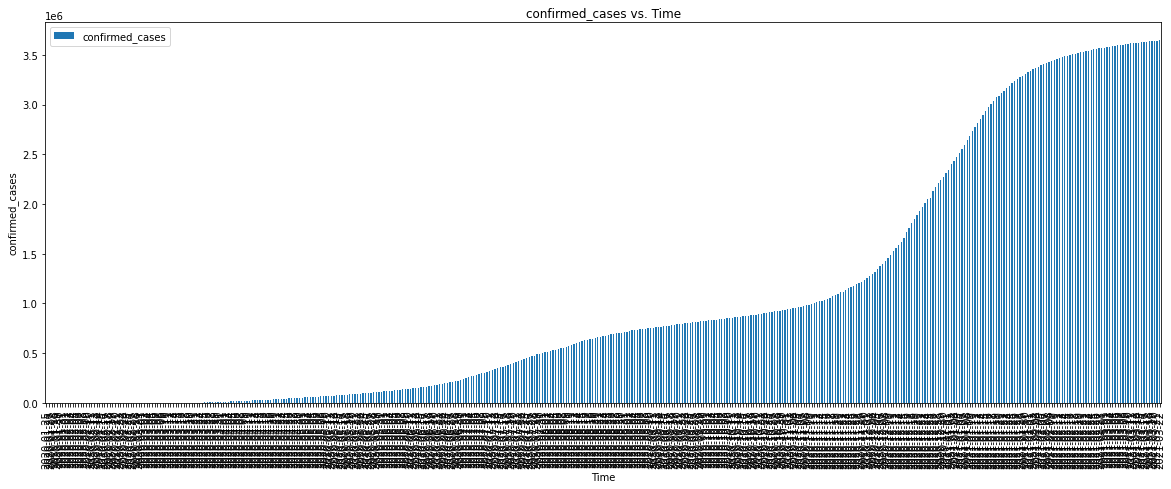

In [37]:
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.html
ax = df_ca.plot(kind='bar', x='date', y='confirmed_cases', figsize=(20,7))
ax.set_title('confirmed_cases vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('confirmed_cases');

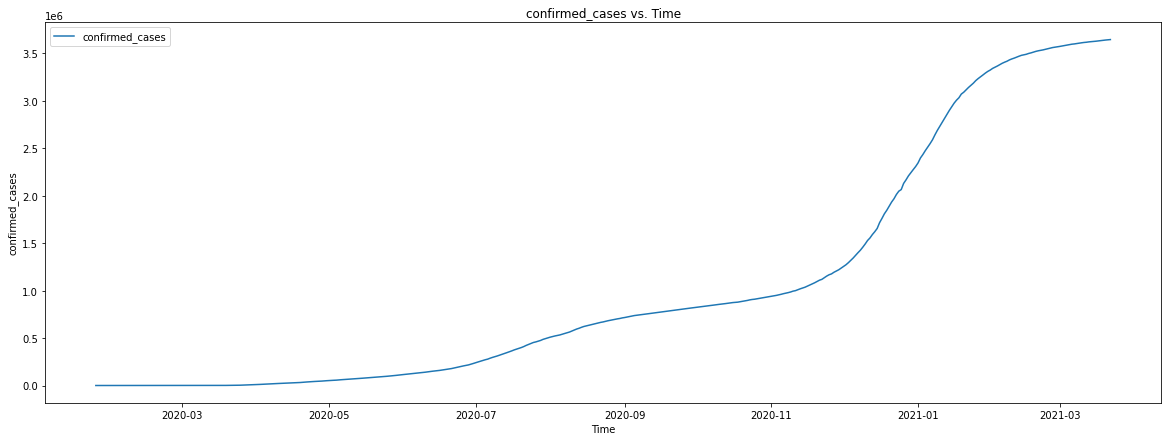

In [38]:
ax = df_ca.plot(kind='line', x='date', y='confirmed_cases', figsize=(20,7))
ax.set_title('confirmed_cases vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('confirmed_cases');

In [39]:
ax.figure.savefig("nytcovid_confirmed_cases.pdf")

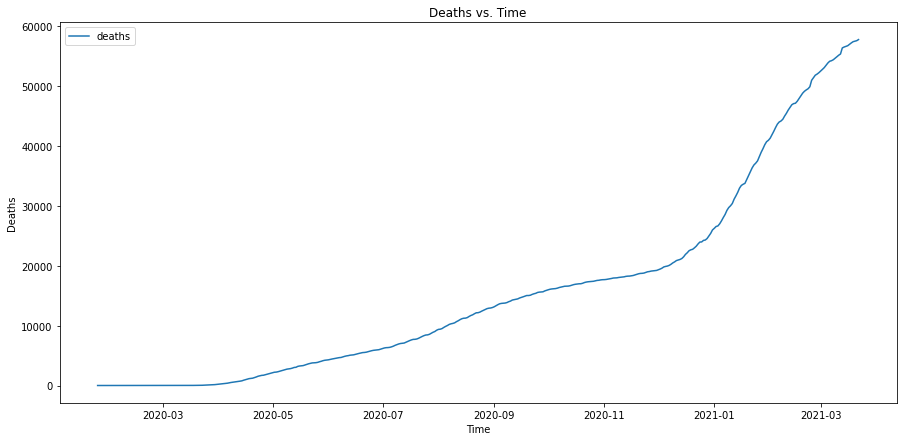

In [40]:
ax = df_ca.plot(kind='line', x='date', y='deaths', figsize=(15,7))
ax.set_title('Deaths vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('Deaths');
ax.figure.savefig("nytcovid_Deaths.pdf")

In [41]:
#Click download in Files section, or use the following command
from google.colab import files
files.download('nytcovid_Deaths.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
!pwd

/content


In [43]:
#Save to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
!cp ./nytcovid_confirmed_cases.pdf ./drive/My\ Drive/Colab\ Notebooks/CMPE181Sp2021

cp: cannot create regular file './drive/My Drive/Colab Notebooks/CMPE181Sp2021': No such file or directory


In [45]:
! pip install fbprophet
#https://facebook.github.io/prophet/

In [46]:
from fbprophet import Prophet
import pandas as pd

In [47]:
# Set variables 
country = 'United States'
filter_case = 'confirmed_cases' #
period_to_forecast = 45

# Filter data
#df = df[df['location']==country]
df_ca.rename(columns={"date": "ds", filter_case: "y"},inplace=True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
df_ca['ds'] = pd.to_datetime(df_ca['ds'],infer_datetime_format=True)
df_ca = df_ca[df_ca['ds']>"2020-02-01"]
df_ca['y'] = df_ca['y'].astype(int)
df_ca = df_ca[['y','ds']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
df_ca

,y,ds
39,6,2020-02-02
44,6,2020-02-03
49,6,2020-02-04
55,6,2020-02-05
61,6,2020-02-06
...,...,...
20950,3635303,2021-03-18
21005,3638515,2021-03-19
21060,3640704,2021-03-20
21115,3642652,2021-03-21


In [50]:
# Run Prophet to get predictions
pred = Prophet(yearly_seasonality=False, daily_seasonality=False)
pred.fit(df_ca)
future = pred.make_future_dataframe(periods=60)
forecast = pred.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [51]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
470,2021-05-17,5.039224e+06,4.748074e+06,5.340318e+06,4.793836e+06,5.324305e+06,-2983.922700,-2983.922700,-2983.922700,-2983.922700,-2983.922700,-2983.922700,0.0,0.0,0.0,5.036240e+06
471,2021-05-18,5.057907e+06,4.787675e+06,5.372836e+06,4.805696e+06,5.352832e+06,1947.089478,1947.089478,1947.089478,1947.089478,1947.089478,1947.089478,0.0,0.0,0.0,5.059854e+06
472,2021-05-19,5.076590e+06,4.791028e+06,5.418120e+06,4.819159e+06,5.383289e+06,1537.093560,1537.093560,1537.093560,1537.093560,1537.093560,1537.093560,0.0,0.0,0.0,5.078127e+06
473,2021-05-20,5.095273e+06,4.794839e+06,5.435913e+06,4.831099e+06,5.413702e+06,1142.342656,1142.342656,1142.342656,1142.342656,1142.342656,1142.342656,0.0,0.0,0.0,5.096416e+06
474,2021-05-21,5.113957e+06,4.824697e+06,5.451121e+06,4.842616e+06,5.440576e+06,436.126012,436.126012,436.126012,436.126012,436.126012,436.126012,0.0,0.0,0.0,5.114393e+06


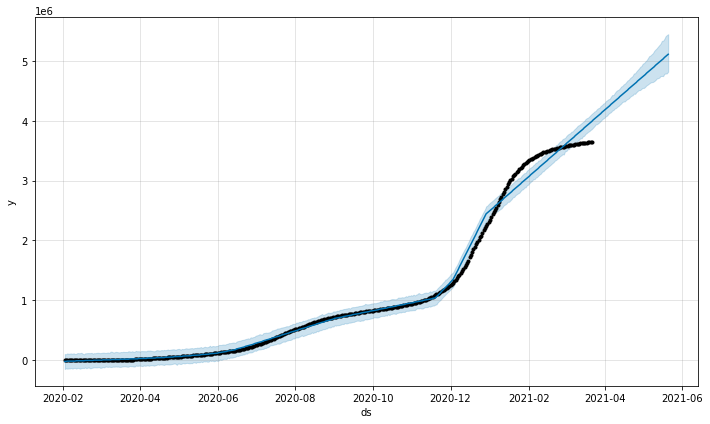

In [52]:
#Plot the prediction Graph
graph = pred.plot(forecast)

In [53]:
graph.savefig("Prophet_prediction.pdf")

In [54]:
df_ca.to_csv('df_ca.csv', index=False)